<h1><center>MNIST classification using Keras<center></h1>

In [2]:
# Importing the Keras main module forcing tensorflow 1.x backend
import tensorflow as tf
import keras
print("Using tensorflow version " + str(tf.__version__))
print("Using keras version " + str(keras.__version__))

Using tensorflow version 2.1.0
Using keras version 2.3.1


In [ ]:
# The MNSIT dataset is ready to be imported from Keras into RAM
# Warning: you cannot do that for larger databases (e.g., ImageNet)
from keras.datasets import mnist
# START CODE HERE
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# END CODE HERE

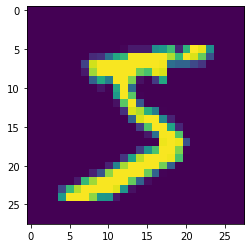

In [ ]:
# Let us visualize the first training sample using the Matplotlib library
from matplotlib import pyplot as plt
# START CODE HERE
sample = X_train[0]
plt.imshow(sample)
plt.show()
# END CODE HERE

In [ ]:
y_train.shape

(60000,)

In [ ]:
from keras.utils.np_utils import to_categorical
# START CODE HERE
y_test = to_categorical(y_test, num_classes = 10, dtype = 'int32')
y_train = to_categorical(y_train, num_classes = 10, dtype =  'int32')
# END CODE HERE

In [ ]:
# Reshape to proper images with 1 color channel according to backend scheme
img_rows, img_cols = X_train.shape[1], X_train.shape[2]
# START CODE HERE
X_train = X_train.reshape((X_train.shape[0],img_rows*img_cols))
X_test = X_test.reshape((X_test.shape[0],img_rows*img_cols))
# END CODE HERE

# Cast pixels from uint8 to float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Now let us normalize the images so that they have zero mean and standard deviation
# Hint: are real testing data statistics known at training time ?
# START CODE HER
X_train /= 255
X_test /= 255
# END CODE HERE

In [ ]:
X_test.shape

(10000, 784)

In [ ]:
# The Sequential module is a container for more complex NN elements and
# defines a loop-less NN architecture
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

# START CODE HERE
input_sh = X_train.shape[1]
output_sh = 10
model = Sequential()
model.add(Dense(300,activation='sigmoid',input_dim = input_sh))
model.add(Dense(output_sh, activation = 'softmax'))

from keras import optimizers
opt = optimizers.SGD(lr = 0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
fitted = model.fit(X_train, y_train, batch_size=10, epochs=10, verbose=1, validation_data=(X_test, y_test))
model.summary()

# END CODE HERE

Epoch 1/10
6000/6000 [==============================] - 12s 2ms/step - loss: 1.2442 - accuracy: 0.6976 - val_loss: 0.4246 - val_accuracy: 0.8874
Epoch 2/10
6000/6000 [==============================] - 11s 2ms/step - loss: 0.4106 - accuracy: 0.8892 - val_loss: 0.3433 - val_accuracy: 0.9050
Epoch 3/10
6000/6000 [==============================] - 12s 2ms/step - loss: 0.3490 - accuracy: 0.8998 - val_loss: 0.3120 - val_accuracy: 0.9099
Epoch 4/10
6000/6000 [==============================] - 11s 2ms/step - loss: 0.3245 - accuracy: 0.9045 - val_loss: 0.2969 - val_accuracy: 0.9156
Epoch 5/10
6000/6000 [==============================] - 11s 2ms/step - loss: 0.2998 - accuracy: 0.9146 - val_loss: 0.2903 - val_accuracy: 0.9186
Epoch 6/10
6000/6000 [==============================] - 12s 2ms/step - loss: 0.2983 - accuracy: 0.9147 - val_loss: 0.2760 - val_accuracy: 0.9226
Epoch 7/10
6000/6000 [==============================] - 12s 2ms/step - loss: 0.2810 - accuracy: 0.9180 - val_loss: 0.2707 - val_ac

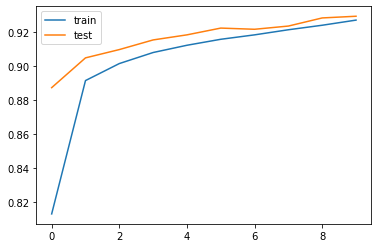

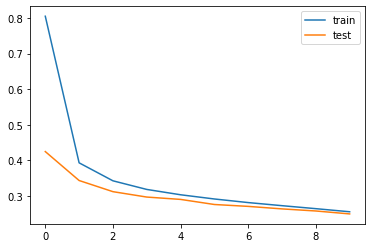

Test accuracy: 0.9296000003814697


In [ ]:
plt.plot(fitted.history['accuracy'])
plt.plot(fitted.history['val_accuracy'])
plt.legend(['train', 'test'])
plt.show()
plt.plot(fitted.history['loss'])
plt.plot(fitted.history['val_loss'])
plt.legend(['train', 'test'])
plt.show()
#We can conclude that the quality of the training is very good since the training and testing error are very close

score = model.evaluate(X_test, y_test, verbose=0) 
print('Test accuracy:', score[1])

We can conclude from this graph that the training and testing accuracy and loss are very small which suggests that no overfitting has occured

Epoch 1/10
3000/3000 [==============================] - 8s 3ms/step - loss: 0.2472 - accuracy: 0.9300 - val_loss: 0.2434 - val_accuracy: 0.9300
Epoch 2/10
3000/3000 [==============================] - 8s 3ms/step - loss: 0.2433 - accuracy: 0.9308 - val_loss: 0.2392 - val_accuracy: 0.9329
Epoch 3/10
3000/3000 [==============================] - 8s 3ms/step - loss: 0.2394 - accuracy: 0.9321 - val_loss: 0.2357 - val_accuracy: 0.9330
Epoch 4/10
3000/3000 [==============================] - 8s 3ms/step - loss: 0.2354 - accuracy: 0.9332 - val_loss: 0.2319 - val_accuracy: 0.9337
Epoch 5/10
3000/3000 [==============================] - 8s 3ms/step - loss: 0.2316 - accuracy: 0.9339 - val_loss: 0.2284 - val_accuracy: 0.9357
Epoch 6/10
3000/3000 [==============================] - 8s 3ms/step - loss: 0.2278 - accuracy: 0.9356 - val_loss: 0.2256 - val_accuracy: 0.9354
Epoch 7/10
3000/3000 [==============================] - 8s 3ms/step - loss: 0.2240 - accuracy: 0.9366 - val_loss: 0.2232 - val_accuracy:

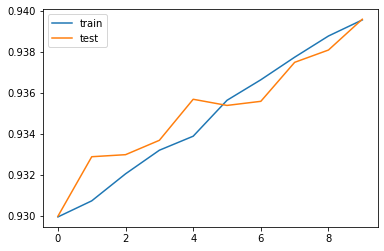

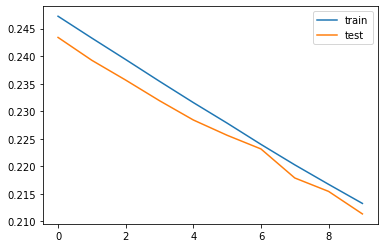

Test accuracy: 0.9395999908447266


In [ ]:
fitted = model.fit(X_train, y_train, batch_size=20, epochs=10, verbose=1, validation_data=(X_test, y_test))
model.summary()
plt.plot(fitted.history['accuracy'])
plt.plot(fitted.history['val_accuracy'])
plt.legend(['train', 'test'])
plt.show()
# summarize history for loss
plt.plot(fitted.history['loss'])
plt.plot(fitted.history['val_loss'])
plt.legend(['train', 'test'])
plt.show()

score = model.evaluate(X_test, y_test, verbose=0) 
print('Test accuracy:', score[1])

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2095 - accuracy: 0.9410 - val_loss: 0.2095 - val_accuracy: 0.9392
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2077 - accuracy: 0.9416 - val_loss: 0.2079 - val_accuracy: 0.9400
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2061 - accuracy: 0.9419 - val_loss: 0.2063 - val_accuracy: 0.9405
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2043 - accuracy: 0.9426 - val_loss: 0.2060 - val_accuracy: 0.9403
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2029 - accuracy: 0.9433 - val_loss: 0.2042 - val_accuracy: 0.9414
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2012 - accuracy: 0.9438 - val_loss: 0.2023 - val_accuracy: 0.9412
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1996 - accuracy: 0.9440 - val_loss: 0.2009 - val_accuracy:

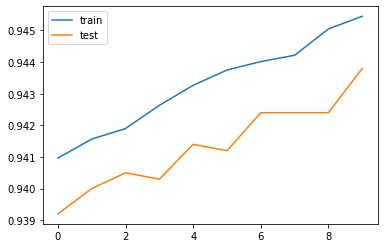

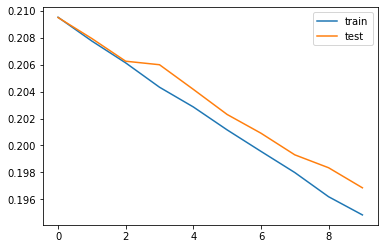

Test accuracy: 0.9437999725341797


In [ ]:
fitted = model.fit(X_train, y_train, batch_size=40, epochs=10, verbose=1, validation_data=(X_test, y_test))
model.summary()
plt.plot(fitted.history['accuracy'])
plt.plot(fitted.history['val_accuracy'])
plt.legend(['train', 'test'])
plt.show()
# summarize history for loss
plt.plot(fitted.history['loss'])
plt.plot(fitted.history['val_loss'])
plt.legend(['train', 'test'])
plt.show()
#We can conclude that the quality of the training is very good since the training and testing error are very close

score = model.evaluate(X_test, y_test, verbose=0) 
print('Test accuracy:', score[1])

Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1931 - accuracy: 0.9459 - val_loss: 0.1958 - val_accuracy: 0.9438
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1927 - accuracy: 0.9460 - val_loss: 0.1954 - val_accuracy: 0.9441
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1921 - accuracy: 0.9463 - val_loss: 0.1948 - val_accuracy: 0.9440
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1917 - accuracy: 0.9463 - val_loss: 0.1944 - val_accuracy: 0.9437
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1912 - accuracy: 0.9460 - val_loss: 0.1939 - val_accuracy: 0.9447
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1908 - accuracy: 0.9467 - val_loss: 0.1934 - val_accuracy: 0.9447
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1902 - accuracy: 0.9465 - val_loss: 0.1930 - val_accuracy: 0.9443
Epoch 

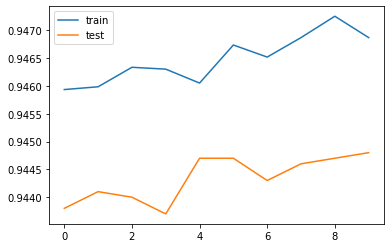

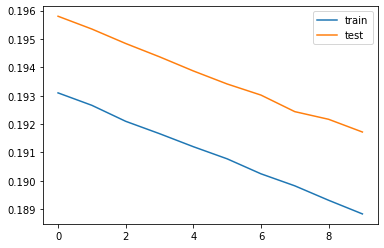

Test accuracy: 0.9448000192642212


In [ ]:
fitted = model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_test, y_test))
model.summary()
plt.plot(fitted.history['accuracy'])
plt.plot(fitted.history['val_accuracy'])
plt.legend(['train', 'test'])
plt.show()
# summarize history for loss
plt.plot(fitted.history['loss'])
plt.plot(fitted.history['val_loss'])
plt.legend(['train', 'test'])
plt.show()
#We can conclude that the quality of the training is very good since the training and testing error are very close

score = model.evaluate(X_test, y_test, verbose=0) 
print('Test accuracy:', score[1])

Epoch 1/10
86/86 [==============================] - 1s 13ms/step - loss: 0.1883 - accuracy: 0.9469 - val_loss: 0.1916 - val_accuracy: 0.9451
Epoch 2/10
86/86 [==============================] - 1s 13ms/step - loss: 0.1882 - accuracy: 0.9471 - val_loss: 0.1916 - val_accuracy: 0.9452
Epoch 3/10
86/86 [==============================] - 1s 13ms/step - loss: 0.1882 - accuracy: 0.9471 - val_loss: 0.1915 - val_accuracy: 0.9451
Epoch 4/10
86/86 [==============================] - 1s 12ms/step - loss: 0.1881 - accuracy: 0.9471 - val_loss: 0.1915 - val_accuracy: 0.9452
Epoch 5/10
86/86 [==============================] - 1s 13ms/step - loss: 0.1880 - accuracy: 0.9471 - val_loss: 0.1914 - val_accuracy: 0.9451
Epoch 6/10
86/86 [==============================] - 1s 13ms/step - loss: 0.1879 - accuracy: 0.9472 - val_loss: 0.1913 - val_accuracy: 0.9454
Epoch 7/10
86/86 [==============================] - 1s 13ms/step - loss: 0.1878 - accuracy: 0.9471 - val_loss: 0.1912 - val_accuracy: 0.9452
Epoch 8/10
86

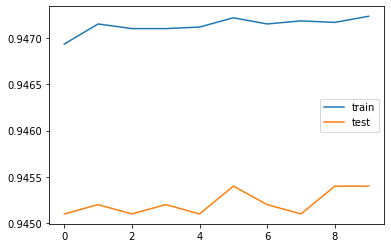

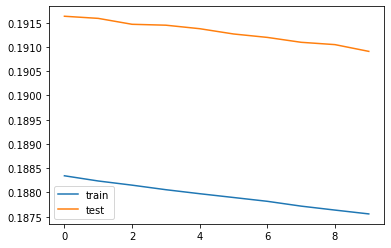

Test accuracy: 0.9453999996185303


In [ ]:
fitted = model.fit(X_train, y_train, batch_size=700, epochs=10, verbose=1, validation_data=(X_test, y_test))
model.summary()
plt.plot(fitted.history['accuracy'])
plt.plot(fitted.history['val_accuracy'])
plt.legend(['train', 'test'])
plt.show()
# summarize history for loss
plt.plot(fitted.history['loss'])
plt.plot(fitted.history['val_loss'])
plt.legend(['train', 'test'])
plt.show()
#We can conclude that the quality of the training is very good since the training and testing error are very close

score = model.evaluate(X_test, y_test, verbose=0) 
print('Test accuracy:', score[1])

From the results, we can conclude that increasing the batch size will increase accuracy of both training and testing set, but although it is almost negligable, there is a case of a small overfitting.

Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 1.5632 - accuracy: 0.5783 - val_loss: 0.6120 - val_accuracy: 0.8623
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.5702 - accuracy: 0.8630 - val_loss: 0.4423 - val_accuracy: 0.8874
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.4441 - accuracy: 0.8843 - val_loss: 0.3806 - val_accuracy: 0.8993
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3881 - accuracy: 0.8958 - val_loss: 0.3471 - val_accuracy: 0.9057
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3609 - accuracy: 0.9014 - val_loss: 0.3244 - val_accuracy: 0.9111
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3377 - accuracy: 0.9081 - val_loss: 0.3093 - val_accuracy: 0.9147
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3162 - accuracy: 0.9130 - val_loss: 0.2966 - val_accuracy: 0.9184
Epoch 

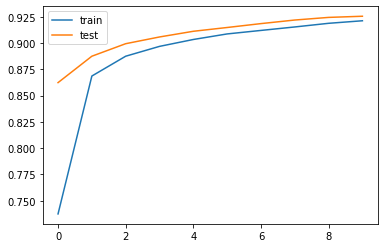

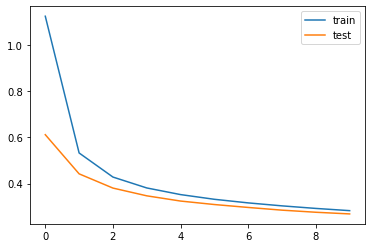

Test accuracy: 0.9453999996185303


In [ ]:
#As we can see increasing the batch size will increase the training and testing accuracy
input_sh = X_train.shape[1]
output_sh = 10
model1 = Sequential()
model1.add(Dense(300,activation='relu',input_dim = input_sh))
model1.add(Dense(output_sh, activation = 'softmax'))
opt = optimizers.SGD(lr = 0.01)
model1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
fitted = model1.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_test, y_test))
model1.summary()
plt.plot(fitted.history['accuracy'])
plt.plot(fitted.history['val_accuracy'])
plt.legend(['train', 'test'])
plt.show()
# summarize history for loss
plt.plot(fitted.history['loss'])
plt.plot(fitted.history['val_loss'])
plt.legend(['train', 'test'])
plt.show()
#We can conclude that the quality of the training is very good since the training and testing error are very close

score = model.evaluate(X_test, y_test, verbose=0) 
print('Test accuracy:', score[1])

Here we can see that using relu increases accuracy by a bit and erases this negligable overfitting that we had.
In fact, using ReLUs (Rectified Linear Units) takes into consideration only positive values, and throws away negative ones. This comes with the advantage of taking the positive values as they are (linear for positive values) which enhances the accuracy in that case.

Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 1.7855 - accuracy: 0.5147 - val_loss: 0.5556 - val_accuracy: 0.8553
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.5092 - accuracy: 0.8657 - val_loss: 0.3668 - val_accuracy: 0.9002
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.3605 - accuracy: 0.8996 - val_loss: 0.3078 - val_accuracy: 0.9133
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.3200 - accuracy: 0.9095 - val_loss: 0.2739 - val_accuracy: 0.9242
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2796 - accuracy: 0.9196 - val_loss: 0.2547 - val_accuracy: 0.9268
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2594 - accuracy: 0.9261 - val_loss: 0.2331 - val_accuracy: 0.9320
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2394 - accuracy: 0.9318 - val_loss: 0.2178 - val_accuracy: 0.9366
Epoch 

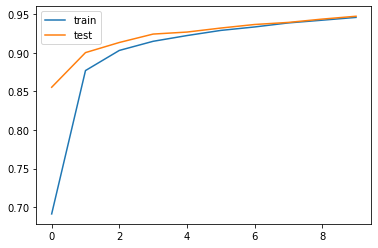

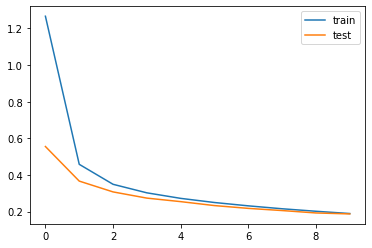

Test accuracy: 0.9453999996185303


In [ ]:
#The relu increased the accuracy even more
input_sh = X_train.shape[1]
output_sh = 10
model2 = Sequential()
model2.add(Dense(300,activation='relu',input_dim = input_sh))
model2.add(Dense(128,activation='relu'))
model2.add(Dense(84,activation='relu'))
model2.add(Dense(output_sh, activation = 'softmax'))
opt = optimizers.SGD(lr = 0.01)
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
fitted = model2.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_test, y_test))
model2.summary()
plt.plot(fitted.history['accuracy'])
plt.plot(fitted.history['val_accuracy'])
plt.legend(['train', 'test'])
plt.show()
# summarize history for loss
plt.plot(fitted.history['loss'])
plt.plot(fitted.history['val_loss'])
plt.legend(['train', 'test'])
plt.show()
#We can conclude that the quality of the training is very good since the training and testing error are very close

score = model.evaluate(X_test, y_test, verbose=0) 
print('Test accuracy:', score[1])

Using a more complex architecture, we get a better performance (better test score) due to the increase of the number of hidden layers. This leads to an increased usage of non-linearities, which represent the actual learning procedure.

However, we cannot increase so much the number of hidden layers in order not to fall in the vanishing gradient of the sigmoid activation function.